In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
heart_disease = pd.read_csv("heart-disease.csv")
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)
clf.score(x_train, y_train)
clf.score(x_test, y_test)

0.7377049180327869

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.60      0.72        35
           1       0.63      0.92      0.75        26

    accuracy                           0.74        61
   macro avg       0.77      0.76      0.74        61
weighted avg       0.79      0.74      0.74        61

[[21 14]
 [ 2 24]]
0.7377049180327869


In [8]:
for i in range(1, 1000, 50):
    print(f"try different n_estimater {i}")
    clf= RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"this model score {clf.score(x_test, y_test)}")
    print("")

try different n_estimater 1
this model score 0.6885245901639344

try different n_estimater 51
this model score 0.7213114754098361

try different n_estimater 101
this model score 0.7213114754098361

try different n_estimater 151
this model score 0.7213114754098361

try different n_estimater 201
this model score 0.7704918032786885

try different n_estimater 251
this model score 0.7377049180327869

try different n_estimater 301
this model score 0.7377049180327869

try different n_estimater 351
this model score 0.7377049180327869

try different n_estimater 401
this model score 0.7377049180327869

try different n_estimater 451
this model score 0.7540983606557377

try different n_estimater 501
this model score 0.7540983606557377

try different n_estimater 551
this model score 0.7377049180327869

try different n_estimater 601
this model score 0.7377049180327869

try different n_estimater 651
this model score 0.7540983606557377

try different n_estimater 701
this model score 0.7704918032786885

In [31]:
import pickle
pickle.dump(clf, open("clf_model.pkl", "wb"))
model = pickle.load(open("clf_model.pkl", "rb"))
model.score(x_test, y_test)

0.8852459016393442

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix# for regrssion problem these function not going to work
from sklearn.metrics import r2_score, mean_squared_error #use this instead
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
car_sales = pd.read_csv("car")
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transform_x = transformer.fit_transform(x)
# x = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]]).astype(int)
transform_x
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transform_x, y)
# from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressors()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)
# model.score(x_test, x_test)
# r2_score(y_test.values.flatten(), y_preds)
mean_squared_error(y_test, y_preds)

FileNotFoundError: [Errno 2] No such file or directory: 'car'

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the data
car_sales = pd.read_csv("car-sales-extended.csv")
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# One-hot encode categorical features
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transform_x = transformer.fit_transform(x)

# Identify numerical features
numerical_features = ["Make", "Colour", "Doors","Odometer (KM)"]
# Standardize numerical features
scaler = StandardScaler()
transform_x2 = scaler.fit_transform(transform_x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(transform_x2, y, test_size=0.2)

# Build and train the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Make predictions and evaluate the model
y_preds = model.predict(x_test)
model.score(x_test, y_test)

0.41681889719899634

In [11]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [155]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
housing_df = pd.read_csv("housing.csv")
housing_df.dropna(inplace=True)
housing_df.drop("ocean_proximity",axis=1, inplace=True)
x = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_preds =model.predict(x_test)

In [156]:
model.score(x_test, y_test)

0.815641864032796

In [158]:
cross_val_score(model, x, y, cv=5)

array([0.42884335, 0.61842922, 0.70210047, 0.57976743, 0.61176819])

In [154]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
housing_df = pd.read_csv("housing.csv")
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()
score = cross_val_score(clf, x, y)
np.mean(score)

0.8082513661202185

In [7]:
print(f"the mean Accuracy of the given model is {np.mean(score) * 100:.2f}%")

the mean Accuracy of the given model is 80.83%


**ROC/AUC receiver operating characteristic / Area under the curve**
* Area Under the Curve
* ROC curve

* Roc is a comparision of model's True Positive rate (tpr) & False Positive rate(fpr)

* True Positive = when model predict 1 and actual truth is 1
* False Positive = when model predict 1 and actula truth is 0
* True Negative = when model predict 0 and actual truth is 0
* False Negative = when model predict 0 and actual result is 1 

In [5]:
from sklearn.metrics import roc_curve
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_probs = clf.predict_proba(x_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [6]:
%matplotlib inline
def roc_curve_plot(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="blue", linestyle="--", label="Baseline")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics")
    plt.legend()
    plt.show()

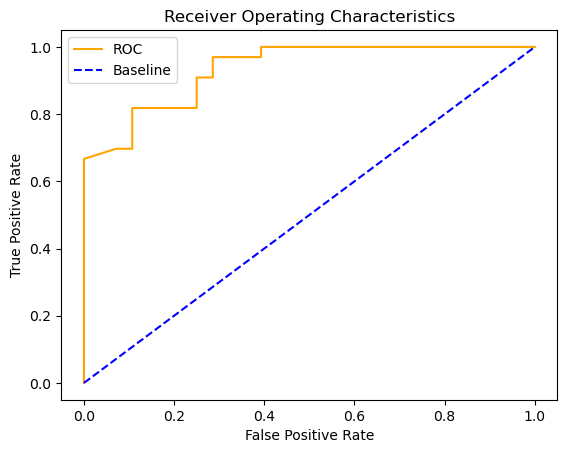

In [7]:
roc_curve_plot(fpr, tpr)

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.974400871459695

In [20]:
np.mean(cross_val_score(clf, x, y))

0.8116939890710382

In [27]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion = confusion_matrix(y_test, y_preds)

In [51]:
import seaborn as sns
sns.set(font_scale=1.5)

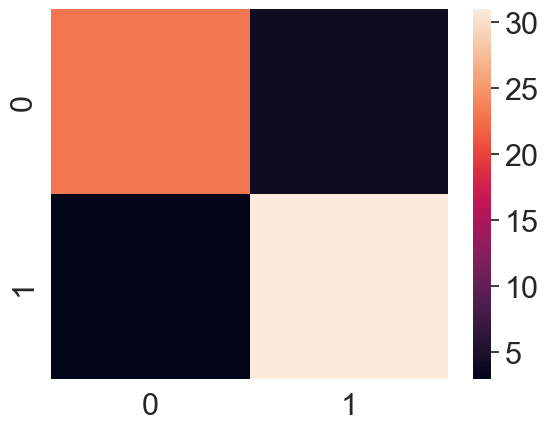

In [50]:
sns.heatmap(confusion);

In [36]:
pd.crosstab(y_test, y_preds, rownames=["True Value"], colnames=["predicted value"])

predicted value,0,1
True Value,,
0,23,4
1,3,31


In [33]:
len(y_preds)

61

In [34]:
len(y_test)

61

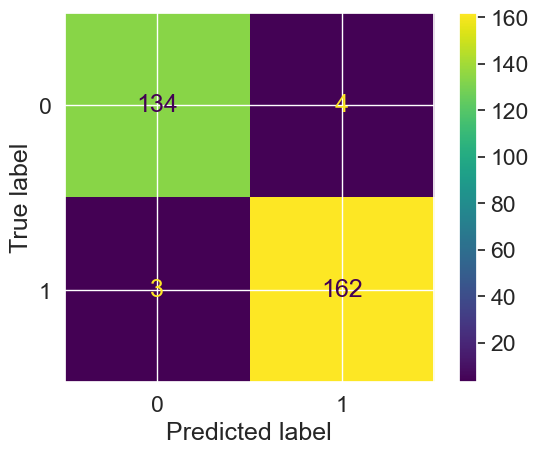

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf,x, y);

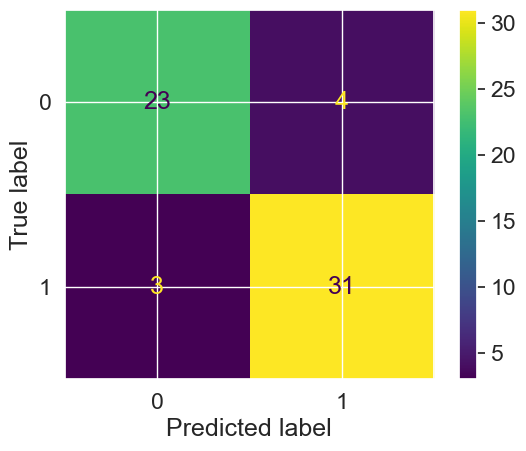

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [45]:
from sklearn.metrics import classification_report
disease_true = np.zeros(1000)
disease_true[0] = 1
disease_preds = np.zeros(1000)
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\muham\conda_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\conda_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\conda_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


In [ ]:
housing_df = pd.read_csv("housing.csv")
housing_df.dropna(inplace=True)
housing_df.drop()

In [93]:
from sklearn.ensemble import RandomForestRegressor
x = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)
model.score(x_test, y_test)

0.015

In [94]:
np.mean(x_test)

575.4801519375001

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()

In [111]:
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
np.mean(cv_acc)

0.8315300546448088

In [124]:
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")

In [125]:
np.mean(cv_precision)

0.841392274444931

In [138]:
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8666666666666666

In [140]:
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1_micro")
np.mean(cv_f1)

0.8183606557377049

In [141]:
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8369582239383266

# for regression problem the `scoring` parameter of cross_val_score


In [145]:
cv_mae = cross_val_score(model, x, y, scoring = "neg_mean_absolute_error")

In [146]:
np.mean(cv_mae)

-0.17846994535519126

In [147]:
cv_mse = cross_val_score(model, x, y, scoring = "neg_mean_squared_error")
cv_mse

array([-0.19672131, -0.13114754, -0.21311475, -0.16666667, -0.25      ])

In [149]:
cv_mse = cross_val_score(model, x, y,cv=5, scoring = None)
np.mean(cv_mse)

0.8348633879781421

# Using different evaluation metrics as sklearn function

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
# for classification problem

#### and use or try all of the in your classification model

In [155]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# for regression problem

# Tunning hyperparameter of a model

In [6]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [7]:
def evaluate_preds(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {"Accuracy": round(accuracy, 2), "Precision": round(precision, 2), "Recall": round(recall, 2),
            "F1":round(f1, 2)}

# Manually spliting the data from the dataFrame

In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease_shuffle = heart_disease.sample(frac=1)
x = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]
train_split = round(0.7 * len(heart_disease_shuffle))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffle))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
# make basline prediction
y_preds = clf.predict(x_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

{'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'F1': 0.85}

In [9]:
np.random.seed(2)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf2.fit(x_train, y_train)
y_preds = clf2.predict(x_valid)
baseline2_metrics = evaluate_preds(y_valid, y_preds)
baseline2_metrics

{'Accuracy': 0.84, 'Precision': 0.82, 'Recall': 0.92, 'F1': 0.87}

# Hyperparameter tunning with RandomizedSearchCV

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
grid = {"n_estimators":[10,100,200,500,1000],
       "max_depth":[None, 5, 10, 20, 30],
       "max_features":["sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
       }
np.random.seed(42)
x = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10,#no: of models to try
                           cv=5, verbose=2)
rs_clf.fit(x_train, y_train)

NameError: name 'heart_disease_shuffle' is not defined

In [48]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [49]:
rs_y_preds = rs_clf.predict(x_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

In [50]:
rs_metrics

{'Accuracy': 0.84, 'Precision': 0.76, 'Recall': 0.93, 'F1': 0.84}

# Tunning Hyperparameter with GridSearchCV

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
grid={"n_estimators":[10,100],
     "max_depth":[None, 10],
      "max_features":["sqrt"],
      "min_samples_split":[6],
      "min_samples_leaf":[2,5]
     }
clf = RandomForestClassifier(n_jobs=1)
gs_clf = GridSearchCV(estimator=clf, param_grid=grid, cv=5,verbose=2)
gs_clf.fit(x_train, y_train)
gs_y_preds = gs_clf.predict(x_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_esti

In [56]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 100}

In [58]:
gs_metrics = evaluate_preds(y_test, gs_y_preds)

In [60]:
compare = pd.DataFrame({"baseline_metrics":baseline_metrics, "baseline2_metrics":baseline2_metrics, "rs_metrics":rs_metrics, "gs_metrics":gs_metrics})

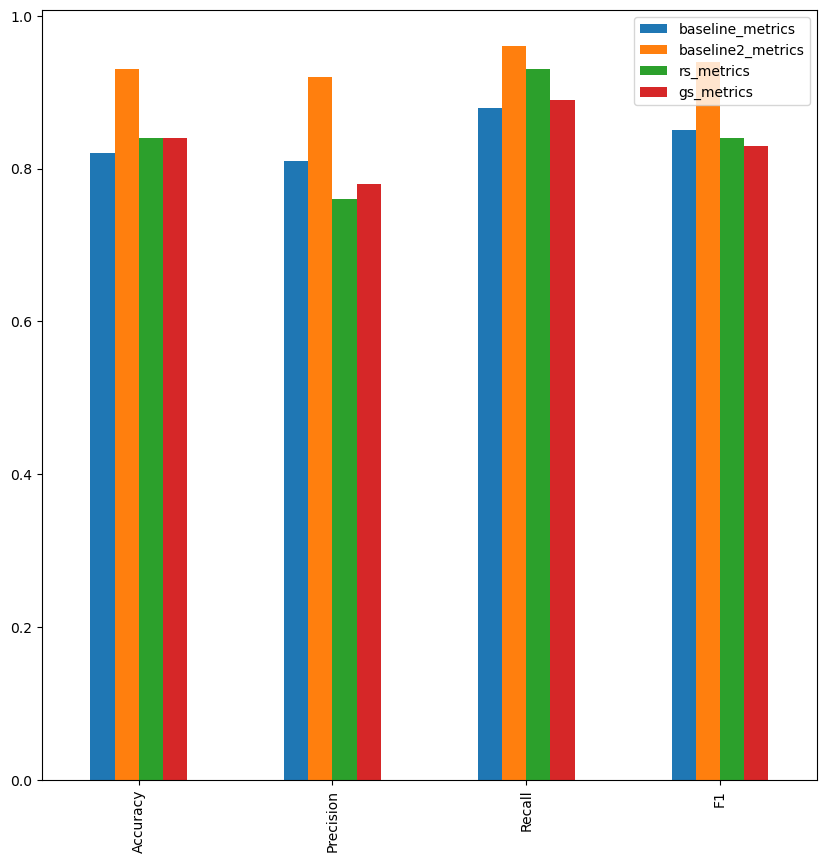

In [76]:
compare.plot.bar(figsize=(10, 10));

# Saving the trained Model

In [64]:
from joblib import dump, load

In [72]:
dump(gs_clf, filename="basline.job")

['basline.job']

In [75]:
job_model = load(filename="basline.job")
job_preds = job_model.predict(x_test)
evaluate_preds(y_test, job_preds)

{'Accuracy': 0.84, 'Precision': 0.78, 'Recall': 0.89, 'F1': 0.83}

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
np.random.seed(42)
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

categorical_feature = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                          ("one_hot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numerical_feature = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

preprocessing = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_feature),
                  ("door", door_transformer, door_feature),
                  ("num", numerical_transformer,numerical_feature )])

model = Pipeline(steps=[("preprocessing", preprocessing),
                       ("model", RandomForestRegressor(n_jobs=-1))])


model.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor(n_jobs=-1))])

In [116]:
grid = {
    "preprocessing__num__imputer__strategy":["mean", "median"],
    "model__n_estimators":[100, 1000],
    "model__max_depth":[None, 5],
    "model__max_features":["sqrt"],
    "model__min_samples_split":[2, 4]
}
gs_model = RandomizedSearchCV(model, grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)
gs_model.score(x_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_sam

0.2925531937713163